<a href="https://colab.research.google.com/github/GalBuzi/FullStackProject_CookingRecipes/blob/master/Ass2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Assingment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

## About the data : 

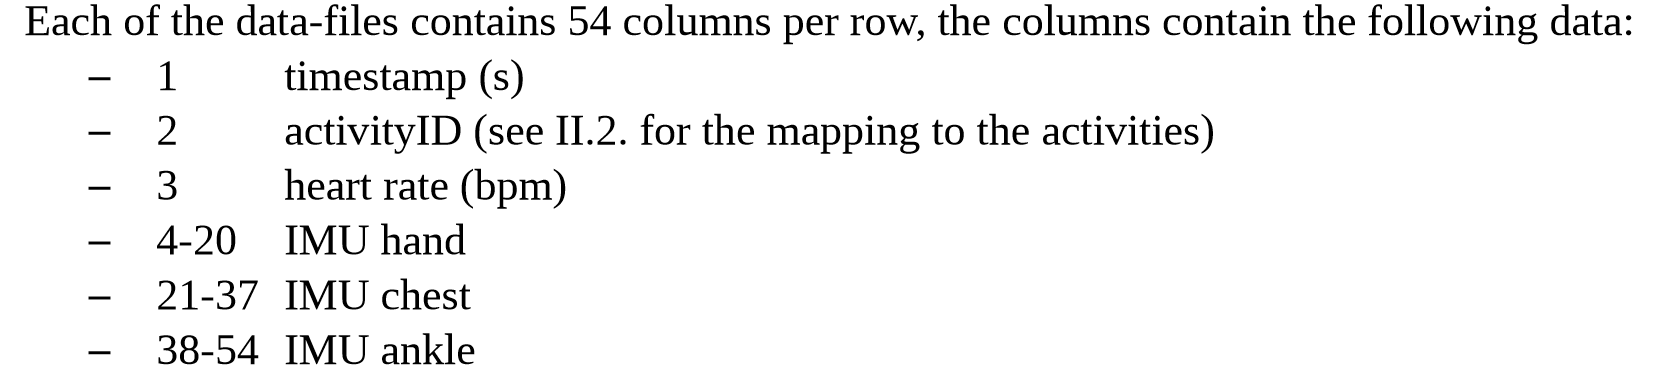

**Activities**
2.png

**Subjects**
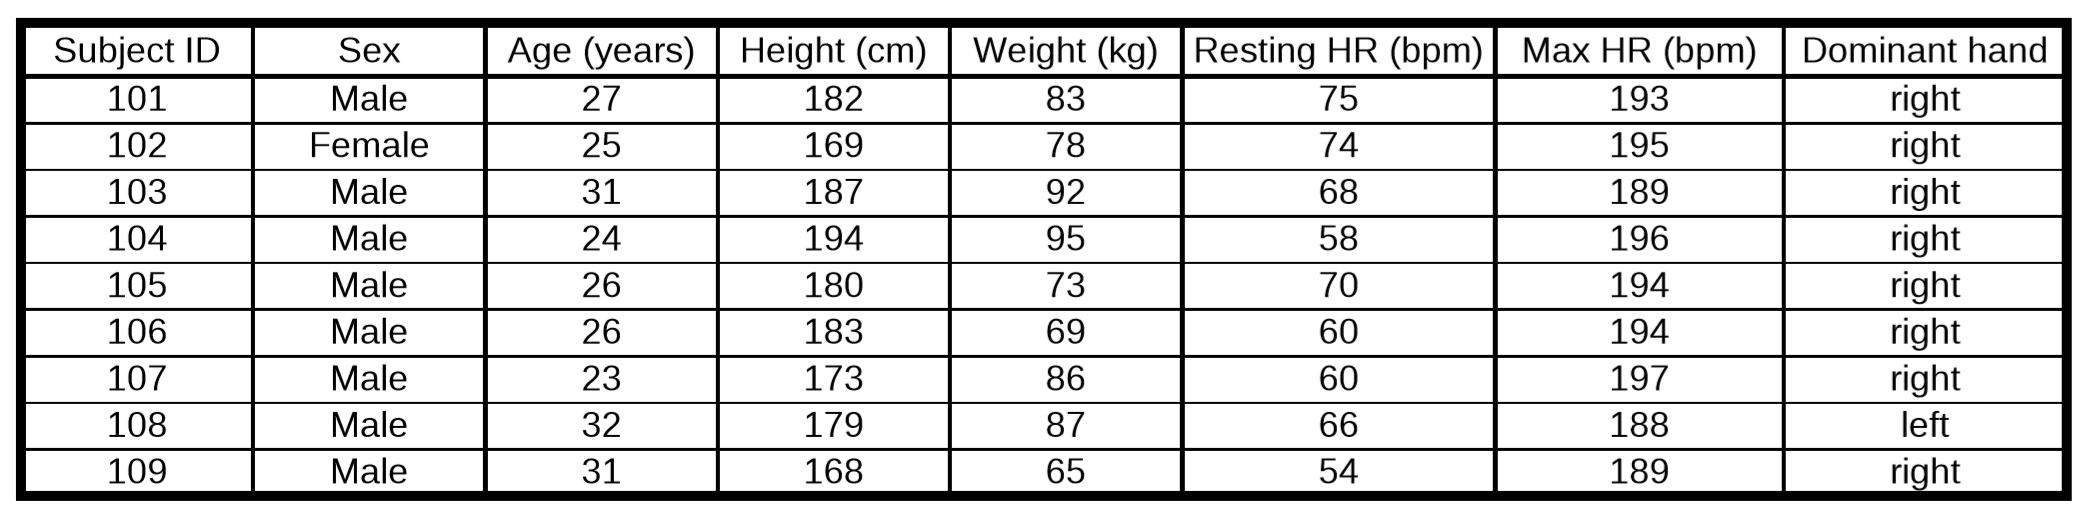

In [ ]:
foler_data_path = r'drive/My Drive/DeepLearnCourse/ass2/Protocol/'

subjectID = [101,102,103,104,105,106,107,108,109]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

activityNameToIdDict = {'transient' : 0,
              'lying' : 1,
              'sitting' : 2,
              'standing' :3,
              'walking' :4,
              'running' :5,
              'cycling':6,
              'Nordic_walking' :7,
              'watching_TV':9,
              'computer_work':10,
              'car driving':11,
              'ascending_stairs':12,
              'descending_stairs':13,
              'vacuum_cleaning':16,
              'ironing':17,
              'folding_laundry':18,
              'house_cleaning':19,
              'playing_soccer':20,
              'rope_jumping':24 }

activity_nums = list(activityIDdict.keys())
activity_names = list(activityIDdict.values())

cols = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_x', 'handAcc16_y', 'handAcc16_z', 
           'handAcc6_x', 'handAcc6_y', 'handAcc6_z', 
           'handGyro_x', 'handGyro_y', 'handGyro_z', 
           'handMagne_x', 'handMagne_y', 'handMagne_z',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']


IMUchest = ['chestTemperature', 
           'chestAcc16_x', 'chestAcc16_y', 'chestAcc16_z', 
           'chestAcc6_x', 'chestAcc6_y', 'chestAcc6_z', 
           'chestGyro_x', 'chestGyro_y', 'chestGyro_z', 
           'chestMagne_x', 'chestMagne_y', 'chestMagne_z',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']


IMUankle = ['ankleTemperature', 
           'ankleAcc16_x', 'ankleAcc16_y', 'ankleAcc16_z', 
           'ankleAcc6_x', 'ankleAcc6_y', 'ankleAcc6_z', 
           'ankleGyro_x', 'ankleGyro_y', 'ankleGyro_z', 
           'ankleMagne_x', 'ankleMagne_y', 'ankleMagne_z',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = cols + IMUhand + IMUchest + IMUankle 
columns_with_subject = cols + IMUhand + IMUchest + IMUankle + ['subject_num']

len(columns) # need to be 54



we need to read all train data into one dataframe to work with
we will read each subject table and concatenate them to eachother

# Q1 - Data Exploration:

In [ ]:
all_data = pd.DataFrame()
for i in range (1, 10):
    procData = pd.read_table(foler_data_path + 'subject10{}.dat'.format(i), header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = 100 + i
    all_data = all_data.append(procData, ignore_index=True)

all_data.reset_index(drop=True, inplace=True)
all_data.head()


as we can learn from the data above, the data must go through some cleaning, for example:

removing any activity with '0' because this activity means the subject isn't doing any from the activities that were mentioned in the README file.

it has very noisy data and that affects the output because the heartrate values will not be extracted from the data point set in the actual important activities.


In [ ]:
#clean data
all_data = all_data.drop(all_data[all_data['activityID']==0].index)
all_data = all_data.interpolate()
# fill all the NaN values in a coulmn with the mean values of the column
for colName in all_data.columns:
    all_data[colName] = all_data[colName].fillna(all_data[colName].mean())
activity_mean = all_data.groupby(['activityID']).mean().reset_index()

all_data.shape

In [ ]:
print('Size of the data: ', all_data.size)
print('Shape of the data: ', all_data.shape)
print('Number of columns in the data: ', len(all_data.columns))
result_id = all_data.groupby(['subject_id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = all_data.groupby(['activityID']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

In [ ]:
def plot_samples(df, column_a, column_b, title, figsize=(10,6)):
    plt.rcParams.update({'font.size': 16})
    size = range(len(df))
    f, ax = plt.subplots(figsize=figsize) 
    plt.bar(size, df[column_a])
    a = ax.set_xticklabels(df[column_b])
    b = ax.legend(fontsize = 20)
    c = ax.set_xticks(np.arange(len(df)))
    d = ax.set_title(title)
    plt.show()

In [ ]:
#present num of samples per subject
sampels = all_data.groupby(['subject_id']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['id'] = sampels['subject_id']
sampels_to_subject['sampels'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
plot_samples(sampels_to_subject,'sampels','id','Number Of Samepls Per Subject')

data is balanced for samples per subject, excepts subject 109 which has very little amount of samples

In [ ]:
sampels = all_data.groupby(['activityID']).count().reset_index()
sampels_to_subject = pd.DataFrame()
sampels_to_subject['activity'] = [activityIDdict[x] for x in sampels['activityID']]
sampels_to_subject['sampels'] = sampels['timestamp']
sampels_to_subject = sampels_to_subject.sort_values(by=['sampels'])
plot_samples(sampels_to_subject,'sampels','activity','Number Of Samepls Per Activity',figsize=(50,10))
del sampels_to_subject

rope jumping has significally less samples - the data isn't totally balanced 

In [ ]:
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['id'] = result_id['subject_id']
sampels_heart_rate['heartrate'] = result_id['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])
plot_samples(sampels_heart_rate,'heartrate','id','Avg heart Rate Per Subject')

In [ ]:
sampels_heart_rate = pd.DataFrame()
sampels_heart_rate['activity'] = [activityIDdict[x] for x in result_act['activityID']]
sampels_heart_rate['heartrate'] = result_act['heartrate']
sampels_heart_rate = sampels_heart_rate.sort_values(by=['heartrate'])

plot_samples(sampels_heart_rate,'heartrate','activity','Avg heart Rate Per Activity',figsize=(50,10))

print(sampels_heart_rate)

del sampels_heart_rate

In [ ]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['hand'] = result_id['handTemperature']
samepls_tempreture['chest'] = result_id['chestTemperature']
samepls_tempreture['ankle'] = result_id['ankleTemperature']
print(samepls_tempreture)

ax = samepls_tempreture.plot(kind='line', figsize=(20,6), title='Avg Tempatures by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))
del samepls_tempreture

In [ ]:
samepls_tempreture = pd.DataFrame()
samepls_tempreture['activity'] = [activityIDdict[x] for x in result_act['activityID']]
samepls_tempreture['hand'] = result_act['handTemperature']
samepls_tempreture['chest'] = result_act['chestTemperature']
samepls_tempreture['ankle'] = result_act['ankleTemperature']
ax = samepls_tempreture.plot(kind='line', figsize=(50,6), title='Avg Tempatures by Activity')
a = ax.set_xticklabels(samepls_tempreture['activity'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls_tempreture)))


In [ ]:
samepls = pd.DataFrame()
samepls['hand_x'] = result_id['handAcc16_x']
samepls['hand_y'] = result_id['handAcc16_y']
samepls['hand_z'] = result_id['handAcc16_z']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Hand Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))

In [ ]:
samepls = pd.DataFrame()
samepls['chest_x'] = result_id['chestAcc16_x']
samepls['chest_y'] = result_id['chestAcc16_y']
samepls['chest_z'] = result_id['chestAcc16_z']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Chest Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))

In [ ]:
samepls = pd.DataFrame()
samepls['ankle_x'] = result_id['ankleAcc16_x']
samepls['ankle_y'] = result_id['ankleAcc16_y']
samepls['ankle_z'] = result_id['ankleAcc16_z']
ax = samepls.plot(kind='line', figsize=(20,6), title='Avg Ankle Acceleration Value by Subjects')
a = ax.set_xticklabels(result_id['subject_id'])
b = ax.legend(fontsize = 20)
c = ax.set_xticks(np.arange(len(samepls)))
del samepls

In [ ]:
!pip install heatmapz

In [ ]:
from heatmap import heatmap, corrplot
dropped_activity = all_data.drop(['activityID'], axis = 1)

plt.figure(figsize=(20, 20))
corrplot(dropped_activity.corr(), size_scale=300);
del dropped_activity

# Q2 :


a. Decide your validation strategy for training your model 

we will use for train set subjects 101-105 and 109.

subject 106 will be the validation set.

subjects 107-108 will use for test set.

In [ ]:
def get_train_test(all_data):
  # create the test data
  subject107 = all_data[all_data['subject_id'] == 107]
  subject108 = all_data[all_data['subject_id'] == 108]
  test = subject107.append(subject108)

  #create validate data
  valid_train = all_data[all_data['subject_id'] == 106]
  valid_test = valid_train['activityID']
  valid_train = valid_train.drop(['activityID'], axis=1)

  # create the train data
  train = all_data[all_data['subject_id'] != 107]
  train = all_data[all_data['subject_id'] != 108]
  train = all_data[all_data['subject_id'] != 106]


  # # drop the columns id
  test = test.drop(["subject_id"], axis=1) # 107-108
  train = train.drop(["subject_id"], axis=1) # all the rest
  valid_train = valid_train.drop(['subject_id'], axis=1)


  # split train and test to X and y
  x_train = train.drop(['activityID'], axis=1)
  x_test = test.drop(['activityID'], axis=1)
  y_train = train['activityID']
  y_test = test['activityID']

  return x_train, x_test, valid_train, valid_test, y_train, y_test

x_train, x_test,valid_train, valid_test, y_train, y_test = get_train_test(all_data)



b.	Create a naïve baseline solution and calculate train and validation score for that solution. This could be predicting last known value, or prediction of the class distribution for each category.


we will try to create a baseline by mean of heartrate and mean of hand temp to decide which activity was perfomed


In [ ]:
b = pd.DataFrame()
b['activity'] = [activityIDdict[x] for x in result_act['activityID']]
b['heartrate'] = result_act['heartrate']
b['handTemp'] = result_act['handTemperature']
b['act_index'] = [activityNameToIdDict[y] for y in b['activity']]
b.set_index('act_index', inplace=True)
b.sort_values(by=['heartrate', 'handTemp'])

In [ ]:
import random

def choose_random_activity(id1,id2):
  rand = random.randint(0, 1)
  if rand == 0:
    return id1

  return id2


def rule_based_baseline(record):

    heart_rate = record['heartrate']
    hand_temp = record['handTemperature']
    activity = 0      
    
    if heart_rate < 95:
      # Activities: 1,2,3,17
      if hand_temp < 33:
        activity = 1
      elif hand_temp < 34 and hand_temp >= 33:
        activity = choose_random_activity(2,3)
      else:
        activity = 17

      
    elif heart_rate < 118:
      # Activities:  16,4
      if(hand_temp < 33):
        activity = 4
      else:
        activity = 16      


    elif heart_rate < 140:
      # Activities:  6,7,13,12
      if hand_temp < 32.3 :
        activity = choose_random_activity(6,7)
      else:
        activity = choose_random_activity(12,13)

      

    elif heart_rate >= 140:
      # Activities: 5,24
      if hand_temp < 30.2:
        activity = 24
      else:
        activity = 5
      

    return activity



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

def get_preds_from_baseline(df):
  
  y_preds = []

  for idx,record in df.iterrows():
    pred = rule_based_baseline(record)
    y_preds.append(pred)

  return y_preds

y_preds_train = get_preds_from_baseline(x_train)
print('train base line results:')
print(accuracy_score(y_preds_train, y_train))

In [ ]:
y_preds_valid = get_preds_from_baseline(valid_train)
print('validation base line results:')
print(accuracy_score(y_preds_valid, valid_test))

In [ ]:
y_preds_test = get_preds_from_baseline(x_test)
print('test base line results:')
print(accuracy_score(y_preds_test, y_test))

we can see that the baseline isn't that bad so heartrate and handTemp has a significance but that is not enough.

In [ ]:
del x_train ,x_test ,valid_train, valid_test, y_train, y_test
del y_preds_train, y_preds_valid, y_preds_test

c.	Fit a classical machine learning model to the data and get a better and solid benchmark for the neural network model.
Think which features will be useful for such a model

In [ ]:
def get_train_valid_test_all_cols_by_subject(data):
  # create the test data
  subject107 = data[data['subject_id'] == 107]
  subject108 = data[data['subject_id'] == 108]
  test_df = subject107.append(subject108)

  #create validate data
  valid_df = data[data['subject_id'] == 106]

  # create the train data
  train_df = data[data['subject_id'] != 107]
  train_df = data[data['subject_id'] != 108]
  train_df = data[data['subject_id'] != 106]

  return train_df, valid_df, test_df

train_df, valid_df, test_df = get_train_valid_test_all_cols_by_subject(all_data)
train_df

we chose the most correlated columns in data to be trained and tested

In [ ]:

relevant_cols_by_corr_table = ['timestamp', 'activityID','heartrate','subject_id','handTemperature', 
           'handAcc16_x', 'handAcc16_y', 'handAcc16_z', 
           'handAcc6_x', 'handAcc6_y', 'handAcc6_z', #'handGyro_x', 'handGyro_y', 'handGyro_z',
           'chestTemperature', 
           'chestAcc16_x', 'chestAcc16_y', 'chestAcc16_z', 
           'chestAcc6_x', 'chestAcc6_y', 'chestAcc6_z', #'chestGyro_x', 'chestGyro_y', 'chestGyro_z',
           'ankleTemperature', 
           'ankleAcc16_x', 'ankleAcc16_y', 'ankleAcc16_z', 
           'ankleAcc6_x', 'ankleAcc6_y', 'ankleAcc6_z' ] #,'ankleGyro_x', 'ankleGyro_y', 'ankleGyro_z',]



In [ ]:
train_df = train_df[relevant_cols_by_corr_table]
valid_df = valid_df[relevant_cols_by_corr_table]
test_df = test_df[relevant_cols_by_corr_table]
del all_data
# train_df

In [ ]:
from tensorflow.keras.utils import to_categorical
from tqdm.notebook import tqdm
tqdm.pandas()

def get_timeSeries_window_data(df, window_back, jump_by, label, is_categorical):
  x = pd.DataFrame(columns=relevant_cols_by_corr_table)
  y = pd.DataFrame(columns=['activityID'])
  df_copy = df.copy()
  subject_list = df_copy.subject_id.unique()
  activity_list = df_copy.activityID.unique()

  for sub in tqdm(subject_list, desc='subject'):
    for act in tqdm(activity_list, desc='target'):
      subject_activity_df = df_copy[(df_copy.subject_id == sub) & (df_copy.activityID == act)]
      subject_activity_df = subject_activity_df.drop(columns=['subject_id'])

      activity_df = pd.DataFrame(data=subject_activity_df[label], columns=['activityID'])
      # print(activity_df)
      subject_activity_df = subject_activity_df.drop(columns=[label])

      for i in range(window_back, subject_activity_df.shape[0], jump_by):
        # first_row = subject_activity_df.iloc[i-window_back]
        # last_row = subject_activity_df.iloc[i]

        # first_row_time = first_row['timestamp']
        # last_row_time = last_row['timestamp']
        # # print(last_row_time - first_row_time)
        # if last_row_time - first_row_time != 2:
        #   continue

        prev_window = subject_activity_df[i-window_back:i]
        prev_win_mean = prev_window.rolling(window=window_back).mean()
        x = x.append(prev_win_mean.tail(1),ignore_index=True)

        # print(type(prev_window))
        # print(prev_window)
        # print('==================================================================')
        # print(prev_window.rolling(window=window_back).mean())
        
        # print(i)
        # print(activity_df.iloc[i])
        # print(activity_df)
        # print(activity_df.index[0])
        # index = activity_df.index[0] + 200
        # print(index)
        prev_window_act = activity_df[i-window_back:i]
        # print(prev_window_act.tail(1))

        y = y.append(prev_window_act.tail(1), ignore_index=True )

        # print(x,y)
      #   break
      # break

    x = x.drop(columns=['activityID','subject_id'])
    return x, y


In [ ]:
window_back = 200
label = 'activityID'
is_categorical = True
jump_by = 50

# bla , blabla = get_timeSeries_window_data(train_df, window_back, jump_by, label, True)
x_train, y_train = get_timeSeries_window_data(train_df, window_back, jump_by, label, True)
x_val, y_val = get_timeSeries_window_data(valid_df, window_back, jump_by, label, True)
x_test, y_test = get_timeSeries_window_data(test_df, window_back, jump_by, label, True)
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))
print(len(x_test))
print(len(y_test))
print('==================================================================')

print(x_train)
print(y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver='lbfgs', max_iter=1000)
ranForest = RandomForestClassifier()

y_train = y_train.astype('int')

logReg.fit(x_train, y_train)
ranForest.fit(x_train, y_train)



In [ ]:

logReg_preds_valid = logReg.predict(x_val)
ranForest_preds_valid = ranForest.predict(x_val)

y_val = y_val.astype('int')

print(f'Random Forest accuracy on validation: {accuracy_score(ranForest_preds_valid, y_val)}')
print(f'Logistic Regression accuracy on validation: {accuracy_score(logReg_preds_valid, y_val)}')


In [ ]:

logReg_preds_test = logReg.predict(x_test)
ranForest_preds_test = ranForest.predict(x_test)

y_test = y_test.astype('int')

# print(f'SVM accuracy on test: {accuracy_score(dtree_preds_test, y_test)}')
print(f'Random Forest accuracy on test: {accuracy_score(ranForest_preds_test, y_test)}')
print(f'Logistic Regression accuracy on test: {accuracy_score(logReg_preds_test, y_test)}')


pretty good results for logistic regression and solid result for randomForest

In [ ]:
del x_train, x_test, x_val, y_val, y_train, y_test

# d.	Construct a neural network model and fit it to the data. analyze the results (Use visualizations to present your loss and other metrics you find relevant, show examples for good and bad classification with high probability, and refer to the uncertain predictions.  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Model

In [ ]:
def plot_results(history):
    #accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def get_scaled_data(df,label):
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_t_df = df[[label]]
  x_t_df = df.copy()
  x_t_df = x_t_df.drop([label], axis=1)
  x_t_df_scaled = scaler.fit_transform(x_t_df)
  x_t = []
  y_t = []
  win = 200
  for i in range(win,x_t_df_scaled.shape[0],50):
    x_t.append(x_t_df_scaled[i-win:i,:])
    y_t.append(y_t_df.iloc[i])
  
  return np.array(x_t) , np.array(y_t)

x_train, y_train = get_scaled_data(train_df,'activityID')


In [ ]:
x_val, y_val = get_scaled_data(valid_df,'activityID')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder(handle_unknown='ignore', sparse=False)

y_train_ohe = hot.fit_transform(y_train)
print(hot.categories_)

y_val_ohe = hot.fit_transform(y_val)

# print( y_train_ohe[0] )
# print( y_train_ohe[1] )
# print( y_train_ohe[2] )
# print( y_train_ohe[3] )
# print( y_train_ohe[4] )
# print( y_train_ohe[5] )
# print( y_train_ohe[6] )
# print( y_train_ohe[7] )
# print( y_train_ohe[8] )
# print( y_train_ohe[9] )
# print( y_train_ohe[10] )
# print( y_train_ohe[11] )
# print('=======================================================')
# invert = hot.inverse_transform(y_train_ohe)
# print(invert[2000])
y_val_ohe.shape

In [ ]:
def create_callbacks(path, patience=5, factor=0.1, monitor='val_loss', save_best=True):
    es = EarlyStopping(monitor=monitor, patience=patience, verbose=1,)
    rlr = ReduceLROnPlateau(monitor=monitor, factor=factor, patience=patience)
    model_ckpt = ModelCheckpoint(path, monitor=monitor, save_best_only=save_best)
    return [es, rlr, model_ckpt]

In [ ]:
num = 4

In [ ]:
path_to_save_model_activity = r'drive/My Drive/DeepLearnCourse/ass2/model_best_activity'+str(num)+'.h5'

model_activity = Sequential()
model_activity.add(LSTM(24, input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True))
model_activity.add(Dense(24))
model_activity.add(LSTM(12, return_sequences=False))
model_activity.add(Dense(12))
model_activity.add(Dense(y_train_ohe.shape[1],activation='softmax'))
model_activity.compile( optimizer= 'adam',loss='categorical_crossentropy', metrics=['accuracy'])
model_activity.summary()

In [ ]:
history_act = model_activity.fit(x_train, y_train_ohe, batch_size=128, epochs=10, validation_data=(x_val, y_val_ohe),
                      callbacks=create_callbacks(path=path_to_save_model_activity))

In [ ]:
plot_results(history_act)

In [ ]:
x_test, y_test= get_scaled_data(test_df,'activityID')


In [ ]:
y_test_ohe = hot.fit_transform(y_test)

In [ ]:
model_activity.load_weights(path_to_save_model_activity)
model_activity.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model_activity.evaluate(x_test, y_test_ohe)

In [ ]:
y_test_origin = hot.inverse_transform(y_test_ohe)
preds = model_activity.predict(x_test)
ans = []
for array in preds:
  max_index = array.argmax(axis=0)
  a = np.zeros(array.shape[0])
  a[max_index] = 1
  ans.append(a)

ans_origin = hot.inverse_transform(ans)

In [ ]:
def load_activity_map():
    map = {}
    map[0] = 'transient'
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[9] = 'watching_TV'
    map[10] = 'computer_work'
    map[11] = 'car driving'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[18] = 'folding_laundry'
    map[19] = 'house_cleaning'
    map[20] = 'playing_soccer'
    map[24] = 'rope_jumping'
    return map

In [ ]:
def confusion_matrix_to_model(preds,true):
  # building a map of result to activity
  result = np.unique(preds).tolist() 
  expected = np.unique(true).tolist() 
  combined = list(zip(result,expected))
  conf_map = dict(combined)
  activity_map = load_activity_map()
  labels = [activity_map[conf_map[x]] for x in result]

  con = confusion_matrix(preds,true)
  a = plt.figure(figsize=(20,20), dpi=50)
  a = sns.heatmap(con, cmap='YlGnBu', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
  a = plt.rcParams.update({'font.size': 20})
  a = plt.title('Confusion Matrix')
  a = plt.xlabel('Predictions')
  a = plt.ylabel('True Label')

In [ ]:
confusion_matrix_to_model(ans_origin,y_test_origin)


e.	Pretrain your model on the one of the tasks you suggested in 1c and fine tune the trained model to the data. compare the results you got to previous sections (c-d)

we chose to create a model that make self-supervied mission:
trying to predict the heart rate based on the other sensors and then used that model to predict the activity

In [ ]:
del x_train, y_train, x_val, y_val, x_test, y_test

x_train_hr, y_train_hr = get_scaled_data(train_df,'heartrate')
x_val_hr, y_val_hr = get_scaled_data(valid_df,'heartrate')
x_test_hr, y_test_hr = get_scaled_data(test_df,'heartrate')


In [ ]:
path_to_save_model_heartrate = r'drive/My Drive/DeepLearnCourse/ass2/model_best_heartrate'+str(num)+'.h5'

model_heartrate = Sequential()
model_heartrate.add(LSTM(64, input_shape=(x_train_hr.shape[1],x_train_hr.shape[2]),activation='tanh', return_sequences=True))
model_heartrate.add(Dense(64, activation='relu'))
model_heartrate.add(LSTM(32, activation='tanh', return_sequences=False))
model_heartrate.add(Dense(32, activation='relu'))
model_heartrate.add(Dense(y_train_hr.shape[1], activation='relu'))

model_heartrate.compile(optimizer='adam', loss='mse', metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
model_heartrate.summary()

In [ ]:
history_hr = model_heartrate.fit(x_train_hr, y_train_hr, batch_size=128, epochs=20, validation_data=(x_val_hr, y_val_hr),
                    callbacks=create_callbacks(path=path_to_save_model_heartrate))

In [ ]:
model_heartrate.evaluate(x_test_hr, y_test_hr)

changing output layer to use weights of heartrate based model to predict activity

In [ ]:
output = model_heartrate.layers[-4].output

x = LSTM(12, return_sequences=False)(output)
outputs = Dense(y_train_ohe.shape[1], activation='softmax')(x)

for layer in model_heartrate.layers:
    layer.trainable = False

transfer_model = Model(inputs=model_heartrate.inputs, outputs=outputs)

In [ ]:
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
transfer_model.summary()

In [ ]:
path_to_save_model_transfer = r'drive/My Drive/DeepLearnCourse/ass2/model_best_transfer'+str(num)+'.h5'

transfer_history = transfer_model.fit(x_train_hr, y_train_ohe, batch_size=128, epochs=10, validation_data=(x_val_hr, y_val_ohe),
                    callbacks=create_callbacks(path=path_to_save_model_transfer))

In [ ]:
plot_results(transfer_history)

In [ ]:
transfer_model.evaluate(x_test_hr, y_test_ohe)

In [ ]:
del x_train_hr, y_train_hr,x_val_hr, y_val_hr,x_test_hr, y_test_hr

In [ ]:
x_train, y_train = get_scaled_data(train_df,'activityID')
x_val, y_val = get_scaled_data(train_df,'activityID')
x_test, y_test = get_scaled_data(train_df,'activityID')


In [ ]:
y_train_ohe = hot.fit_transform(y_train)
print(hot.categories_)

y_val_ohe = hot.fit_transform(y_val)

y_test_ohe = hot.fit_transform(y_test)

del y_train, y_val, y_test

f. model improvements ideas:

1. adding activations to the layers

2. Adding more complexity to the model (more LSTM layers)

3. Adding regularization to the model to prevent overfitting



g. implementation of improvements:

improvement 1 - adding activations to the layers

In [ ]:
improve1 = Sequential()
improve1.add(LSTM(24, input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True, activation='tanh'))
improve1.add(Dense(24, activation='relu'))
improve1.add(LSTM(12, return_sequences=False, activation='tanh'))
improve1.add(Dense(12, activation='relu'))
improve1.add(Dense(y_train_ohe.shape[1],activation='softmax'))
improve1.compile( optimizer= 'adam',loss='categorical_crossentropy', metrics=['accuracy'])
improve1.summary()

In [ ]:
path_to_save_model_imp1 = r'drive/My Drive/DeepLearnCourse/ass2/model_best_imp1'+str(num)+'.h5'

imp1_history = improve1.fit(x_train, y_train_ohe, batch_size=128, epochs=10, validation_data=(x_val, y_val_ohe),
                    callbacks=create_callbacks(path=path_to_save_model_imp1))

In [ ]:
plot_results(imp1_history)

In [ ]:
improve1.evaluate(x_test, y_test_ohe)

In [ ]:
y_test_origin = hot.inverse_transform(y_test_ohe)

preds = improve1.predict(x_test)
ans = []
for array in preds:
  max_index = array.argmax(axis=0)
  a = np.zeros(array.shape[0])
  a[max_index] = 1
  ans.append(a)

ans_origin = hot.inverse_transform(ans)

confusion_matrix_to_model(ans_origin,y_test_origin)

improvement 2 - adding complexity to the layers

In [ ]:
improve2 = Sequential()
improve2.add(LSTM(64, input_shape=(x_train.shape[1],x_train.shape[2]), return_sequences=True, activation='tanh'))
improve2.add(Dense(64, activation='relu'))
improve2.add(Dense(64, activation='relu'))
improve2.add(Dropout(0.2))
improve2.add(LSTM(32, return_sequences=False, activation='tanh'))
improve2.add(Dense(32, activation='relu'))
improve2.add(Dense(32, activation='relu'))
improve2.add(Dense(y_train_ohe.shape[1],activation='softmax'))
improve2.compile( optimizer= 'adam',loss='categorical_crossentropy', metrics=['accuracy'])
improve2.summary()

In [ ]:
path_to_save_model_imp2 = r'drive/My Drive/DeepLearnCourse/ass2/model_best_imp2'+str(num)+'.h5'

imp2_history = improve2.fit(x_train, y_train_ohe, batch_size=128, epochs=10, validation_data=(x_val, y_val_ohe),
                    callbacks=create_callbacks(path=path_to_save_model_imp2))

In [ ]:
plot_results(imp2_history)

In [ ]:
improve2.evaluate(x_test, y_test_ohe)

In [ ]:
y_test_origin = hot.inverse_transform(y_test_ohe)

preds = improve2.predict(x_test)
ans = []
for array in preds:
  max_index = array.argmax(axis=0)
  a = np.zeros(array.shape[0])
  a[max_index] = 1
  ans.append(a)

ans_origin = hot.inverse_transform(ans)

confusion_matrix_to_model(ans_origin,y_test_origin)